In [1]:
import numpy as np
import pywin.scintilla.scintillacon
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt

class KnnClassification_Method:

    def __init__(self,num_neighbors): #knn is the number of nearest neighbors
        self.y_train = None
        self.x_train = None
        self.num_neighbors = num_neighbors

    def fit_KnnAlgorithm(self,x,y):
        self.x_train = x
        self.y_train = y

    def predict_KnnAlgorithm(self,x_test:list) -> list: #X_test is the test data
        y_pred = [] #predicted labels

        for i in range(len(x_test)): #for each data point in test data

            #find the distance
            distances = [] #distances of each data point from the training data
            for j in range(len(self.x_train)): #for each data point in training data
                dist = np.linalg.norm(x_test[i]-self.x_train[j]) #euclidean distance
                distances.append(dist) #append the distance to the list

            #find the k nearest neighbors
            nearest_neighbors = np.argsort(distances)[:self.num_neighbors] #find the k nearest neighbors

            #find the most common class
            class_count = {} #count of each class

            for i in nearest_neighbors: #for each nearest neighbor
                response = self.y_train[i] # get the class of the nearest neighbor
                if response in class_count: # if the class is already in the dictionary
                    class_count[response] += 1 #increment the count
                else: #if the class is not in the dictionary
                    class_count[response] = 1 #set the count to 1

            #find the class with the highest count
            max_class = max(class_count,key=class_count.get)
            y_pred.append(max_class) #append the class to the list of predicted labels
        return y_pred #return the list of predicted labels

    def check_knn_score(self,x_test:list,y_test:list)-> float: #x_test is the test data, y_test is the test labels
        y_pred = self.predict_KnnAlgorithm(x_test) #get the predicted labels
        return accuracy_score(y_test,y_pred) #return the accuracy score



In [2]:
iris = datasets.load_iris()
x= iris.data
y = iris.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
#K-fold cross validation
kf = KFold(n_splits=10) # setting the cross validation to 10 folds
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator

10

100.0


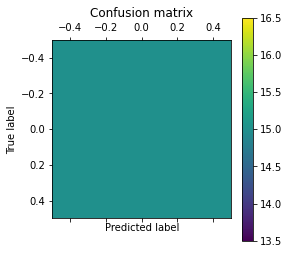

100.0


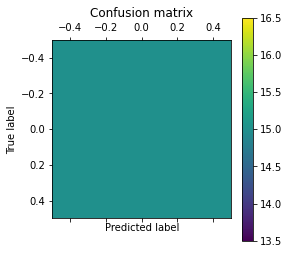

100.0


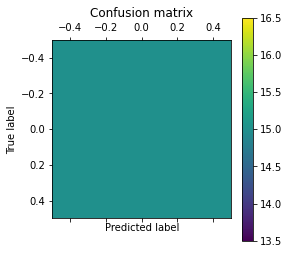

100.0


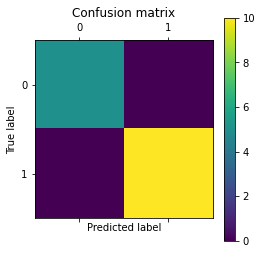

86.66666666666667


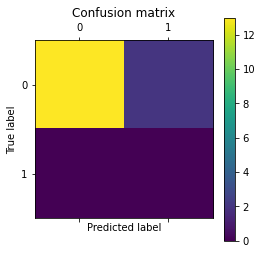

86.66666666666667


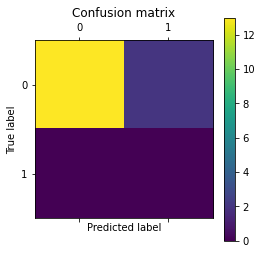

100.0


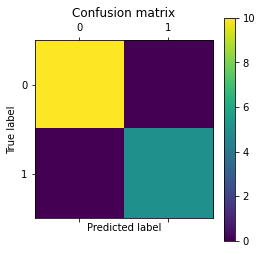

86.66666666666667


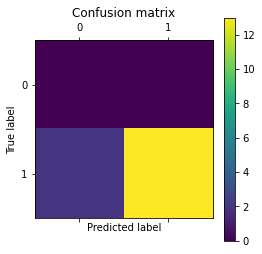

86.66666666666667


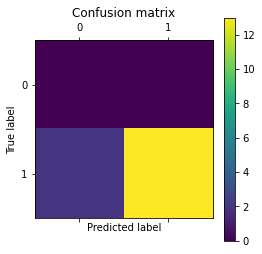

100.0


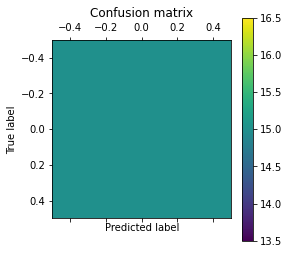

In [4]:

#Loop through the cross validation
for train_index,test_index in kf.split(x): #for each split
    X_train,x_test = x[train_index],x[test_index] #get the training and test data
    y_train,y_test = y[train_index],y[test_index] # get the training and test labels
    num_neighbors = KnnClassification_Method(3)# create a new knn algorithm
    num_neighbors.fit_KnnAlgorithm(X_train,y_train) #fit the algorithm
    y_pred = num_neighbors.predict_KnnAlgorithm(x_test) #predict the labels
    print(accuracy_score(y_test,y_pred)*100) #print the accuracy of the algorithm

    # Add a confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

